In [1]:
##Import required packages
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

no display found. Using non-interactive Agg backend


In [2]:
##Prediction error metrics
#Load dataset
cars_df = pd.read_csv('../../.venv/lib/Datasets/ToyotaCorolla.csv')

In [3]:
#select columns for regression and create list of predictor variable
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Met_Color')
predictors = [s for s in cars_df.columns if s not in excludeColumns]
outcome = 'Price'

In [4]:
#Partition the data
X = cars_df[predictors]
y = cars_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,random_state=1)

In [5]:
#Train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [6]:
#Evaluating performance
#training data
regressionSummary(train_y, reg.predict(train_X))
#validation data
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1121.4220
            Mean Absolute Error (MAE) : 810.9090
          Mean Percentage Error (MPE) : -0.8644
Mean Absolute Percentage Error (MAPE) : 7.9949

Regression statistics

                      Mean Error (ME) : 96.6270
       Root Mean Squared Error (RMSE) : 1389.1182
            Mean Absolute Error (MAE) : 881.6260
          Mean Percentage Error (MPE) : 0.0043
Mean Absolute Percentage Error (MAPE) : 8.8860


In [10]:
##Histograms and boxplots of prediction errors
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X),
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_X),
    'data set': 'validation'
})
boxdata_df = pd.concat([pred_error_train, pred_error_valid], ignore_index=True)


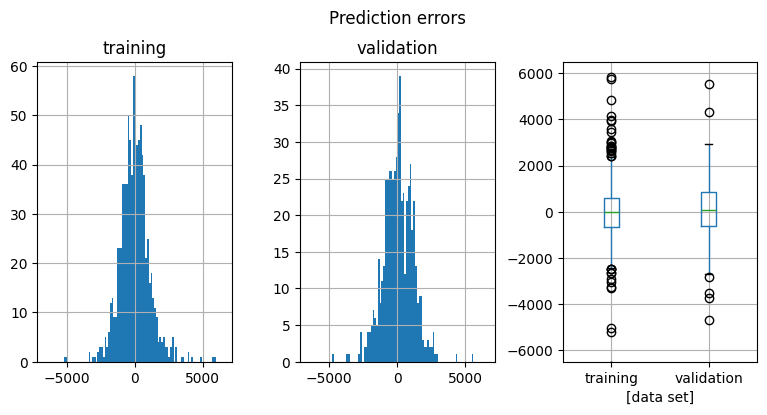

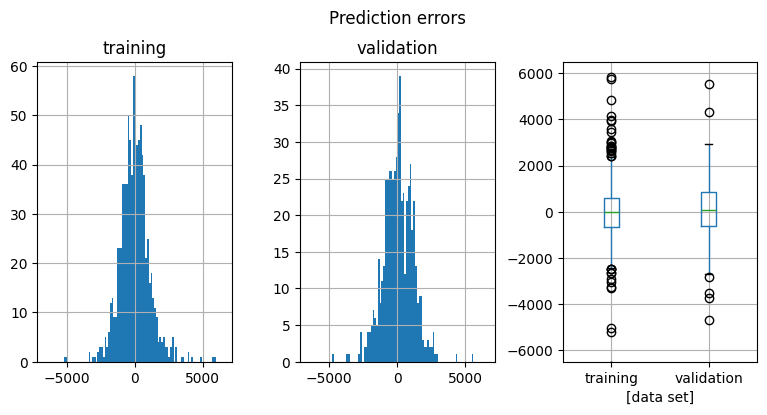

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9, 4)
common = {'bins':100, 'range':[-6500,6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500,6500)
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

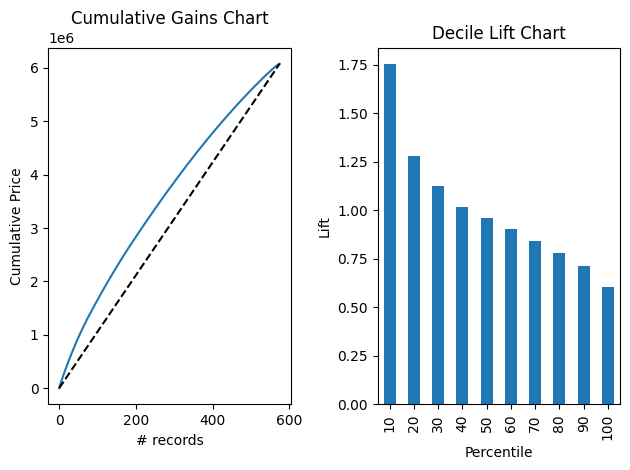

In [14]:
##Cumulative gains and decile lift charts
pred_v = pd.Series(reg.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()